<a href="https://colab.research.google.com/github/kaurprabhmeet/inequality_temperature/blob/main/Inequalities_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Data to Use:***
1. Mortality
https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales
2. Population: https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationestimatesforukenglandandwalesscotlandandnorthernireland
<<<<
3. Temperature:

  max, min temperature by region: https://catalogue.ceda.ac.uk/uuid/4dc8450d889a491ebb20e724debe2dfb
   
   https://www.metoffice.gov.uk/hadobs/hadukp/data/download.html

The following codes are used for processing temperature data.

In [ ]:
import pandas as pd
df = pd.read_csv("https://github.com/PythonForEconomicsWeek2022/clownfish_cookies/blob/temperature/weekly_max_min_Friday.csv")

In [ ]:
import os
import numpy as np
import pandas as pd
import datetime as dt

os.chdir("/content/drive")
path = os.getcwd()
print(path)
# Dictionary for matching region names and region codes. The codes I don't know are assigned '000000000'.
code_dict = {'North East':'E12000001','North West':'E12000002','Yorkshire and The Humber':'E12000003','East Midlands':'E12000004','West Midlands':'E12000005','East':'E12000006','London':'E12000007','South East':'E12000008','South West':'E12000009','Wales':'W92000004','Northern Ireland':'N92000002','West Scotland':'S17000018','East Scotland':'000000000','Isle of Man':'000000000','North Scotland':'000000000','West Scotland':'000000000'}

/content/drive


In [ ]:
df = pd.read_csv('https://github.com/PythonForEconomicsWeek2022/clownfish_cookies/blob/d1d3d2b1557b9f67b2df9b5a039966d05f7b1897/daily_min_max_air_temperature.csv')
print(df.head())

In [ ]:
# Construct a dataframe for daily data
atdf = pd.DataFrame()
for r in code_dict:
    maxdf = pd.read_csv(path + '/air_temp_max_raw/'+r+'.csv',header=None,names=['date','max'])
    mindf = pd.read_csv(path + '/air_temp_min_raw/'+r+'.csv',header=None,names=['date','min'])
    df = pd.concat([maxdf,mindf['min']],axis=1)
    df['region_name'] = r
    df['region_code'] = code_dict[r]
    atdf = pd.concat([atdf,df])
    print(atdf.shape)
atdf['date'] = pd.to_datetime(atdf['date'])

In [ ]:
# Construct a dataframe for weekly data
atweek = pd.DataFrame()
for r in code_dict:
    # for max
    maxdf = pd.read_csv(path + '/tasmax/'+r+'.csv',header=None,names=['date','max'])
    maxdf['date'] = pd.to_datetime(maxdf['date'])
    maxdf = maxdf.set_index('date')
    maxweek = maxdf.resample('W').max() # This method helps calculate weekly max. The date indexes are Sundays of the corresponding weeks.
    # for min
    mindf = pd.read_csv(path + '/tasmin/'+r+'.csv',header=None,names=['date','min'])
    mindf['date'] = pd.to_datetime(mindf['date'])
    mindf = mindf.set_index('date')
    minweek = mindf.resample('W').min()
    # concat max and min
    df = pd.concat([maxweek,minweek['min']],axis=1)
    df['region_name'] = r
    df['region_code'] = code_dict[r]
    atweek = pd.concat([atweek,df])

In [ ]:
# Reorder columns
atdf = atdf[['date','region_code','region_name','min','max']]
atweek = atweek[['region_code','region_name','min','max']]

# Export as csv
atdf.to_csv(path + '\daily_max_min.csv', index=False)
atweek.to_csv(path + '\weekly_max_min.csv')

The following codes are used for processing population data.

In [ ]:
# Importing population data
pop_col = pd.read_excel("Population_by regions_UK_2000 to 2020") # change to path once uploaded 
# Extract years we want
Bool_later_than_2010 = pop_col["year"] > 2010 # change years in question
pop_col_start2010 = pop_col[Bool_later_than_2010]
# Adding column to original data
years_lidt = {'1':'2011', '2':'2012','3':'2013','4':'2014','5':'2015','6':'2016','7':'2017','8':'2018','9':'2019'}

Code for Mortality Data:

In [ ]:
#Imports
import pandas as pd
import warnings
import openpyxl
warnings.simplefilter(action='ignore', category=FutureWarning)

#Initialises and Paths
wd="/Users/yoda/Desktop/Python for Economics 3rd Year/"

In [ ]:
df=pd.DataFrame()
for i in range(2010,2020):
    file=wd+"mortality"+str(i)+".xls"
    
    #reading the mortality file
    local_df=pd.read_excel(file,sheet_name=3)
    #comp_df=pd.read_excel("Compiled.xls"+wd)
    
    len1=(local_df.shape[1])
    if i!=2014:
        week_no=local_df.iloc[2,0:len1]
        week_date=local_df.iloc[3,0:len1]
    else:
        week_no=local_df.iloc[1,0:len1]
        week_date=local_df.iloc[2,0:len1]

    local_df=local_df.iloc[41:51,0:len1]

    local_df=local_df.reset_index(drop=True)
    
    week_no[0]="District No"
    week_no[1]="District Name"
    local_df.columns=week_no
    [str(i) for i in week_no]
    
    #Getting year from file name
    local_df["Year"]=i
    
    local_df=local_df.melt(id_vars=["District Name","District No","Year"])
    local_df.rename(columns={local_df.columns[3]:"Week"},inplace=True)
    print(local_df)

    local_df=local_df.sort_values(by=["District Name","Week"])
        

    df=df.append(local_df)

In [ ]:
print(df)
local_df=local_df.reset_index()
local_df.drop("index",inplace=True,axis=1)
df.to_excel(wd+"merged_mortality.xlsx")

The following code is for the FE regression, Pooled regression and 2-way FE

In [ ]:
# Performing a pooled regression to check if the assumptions of 
# Linearity, Exogeneity, Homoskedasticity , Non-autocorrelation, Non-stochastic independent variables and, No Multicolinearity are satisfied


# Importing the merged dataset
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/PythonForEconomicsWeek2022/clownfish_cookies/main/final.csv', usecols = ['Year', 'Region_Code', 'Region_Name', 'Week_No', 'Week_Date', 'Mortality', 'min', 'max', 'Total_population', '_id'], index_col = ['Region_Name', '_id'])

week = dataset.index.get_level_values('_id').to_list()
dataset['_id'] = pd.Categorical(week)
#dataset['Week_Date'] = pd.to_datetime(dataset['Week_Date'])
#dataset['Week_Date'] = date
#dataset = dataset.set_index(['Region_Name','Week_Date'])
#dataset.head()
dataset.head()




Year Region_Code  Week_No  ...        max  Total_population  _id
Region_Name _id                             ...                                  
North East  1    2019   E12000001        1  ...  10.670487         2,669,941    1
            2    2019   E12000001        2  ...  10.641886         2,669,941    2
            3    2019   E12000001        3  ...   9.949347         2,669,941    3
            4    2019   E12000001        4  ...  10.009549         2,669,941    4
            5    2019   E12000001        5  ...   8.452167         2,669,941    5

[5 rows x 9 columns]

In [ ]:

from linearmodels import PooledOLS
import statsmodels.api as sm

# temperature
dataset['Total_population'] = dataset['Total_population'].str.lstrip()
dataset['Total_population'] = dataset['Total_population'].str.rstrip()
dataset['Total_population'] = dataset['Total_population'].str.strip()
dataset['Total_population'] = dataset['Total_population'].str.replace(',', '')
dataset['Total_population'] = dataset['Total_population'].fillna(0)
dataset['Total_population'] = dataset['Total_population'].astype(int)


deaths = dataset['Mortality']/dataset['Total_population']

dataset.head()


Year Region_Code  Week_No  ...        max  Total_population  _id
Region_Name _id                             ...                                  
North East  1    2019   E12000001        1  ...  10.670487           2669941    1
            2    2019   E12000001        2  ...  10.641886           2669941    2
            3    2019   E12000001        3  ...   9.949347           2669941    3
            4    2019   E12000001        4  ...  10.009549           2669941    4
            5    2019   E12000001        5  ...   8.452167           2669941    5

[5 rows x 9 columns]

In [ ]:
dataset.tail()
# Creating a new var
dataset['deaths'] = deaths
dataset['Year'] = dataset['Year'].astype(int)
d1 = dataset.loc[dataset['Year'] >= 2010,:]

In [ ]:
d1.head()
d1.tail()

In [ ]:
list(d1['Region_Code'].dropna().unique())


In [ ]:

# mortality
varlist = ['min','max']

for i in varlist:
  exog = sm.tools.tools.add_constant(dataset[i])
  endog = d1['deaths']
  mod = PooledOLS(endog, exog)
  pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)

  print(pooledOLS_res)
  # Store values for checking homoskedasticity graphically
  fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
  residuals_pooled_OLS = pooledOLS_res.resids



In [ ]:
# Plotting the residuals
# Homoskedasticity check
import matplotlib.pyplot as plt
 # Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [ ]:

# Check if want to do Breusch-Pagan and Durbin Watson Test

# Fixed effects model
# For intuition: https://www.youtube.com/watch?v=1SchyQ77VFg
# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects
from linearmodels.panel.model import FirstDifferenceOLS
for i in varlist:
  fd_exo = d1[i]
  d1.groupby("Week_Date")[i].diff()

  # First Difference
  model_fd = FirstDifferenceOLS(endog, fd_exo)
  fd_res = model_fd.fit()
  print(fd_res)

  exog = sm.tools.tools.add_constant(d1[i])
  endog = d1['deaths']

  mod = RandomEffects(endog, exog)
  re_res = mod.fit()
  print(re_res)
 


In [ ]:
# Random Effects
mod = RandomEffects(endog, exog)
re_res = mod.fit()
print(re_res)

In [ ]:

# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(fe_res)

In [ ]:

# 2-way fixed effects
model_fe2 = PanelOLS(endog, exog, entity_effects = True, time_effects = True) 
fe_res2 = model_fe2.fit() 
print(fe_res2)

Theme loop for graphs for consistency

Link for designing own theme (in case I have time): https://plotly.com/python/templates/

In [ ]:
# importing the theme templates
import plotly.io as pio
pio.templates
# importing plotly for graphs
import plotly_express as px

# Making an object for theme and graphing
# Other options available: plotly, plotly_white, plotly_dark, ggplot2, seaborn
for template in ["simple_white"]:
    fig = px.scatter(px.data.gapminder(), x="temperature", y="mortality", animation_frame="year", animation_group="region",
           size="pop", color="region", hover_name="region", 
           log_x = True, 
           size_max=45, range_x=[-10,50], range_y=[0,10000000], template = template) # template = template at the end will do the needful
           # change the X and Y range according to the data
    fig.show()

Creating sub-samples for observations in winter and summer

In [ ]:
winter = pd.DataFrame()
summer = pd.DataFrame()
for i in range(2010,2020):
    year_start = dt.datetime(year=i,month=1,day=1)
    year_end = dt.datetime(year=i,month=12,day=31)
    winter_end = dt.datetime(year=i,month=3,day=15)
    winter_start = dt.datetime(year=i,month=11,day=15)
    summer_start = dt.datetime(year=i,month=5,day=15)
    summer_end = dt.datetime(year=i,month=9,day=15)
    w = df.loc[((dataset['Week_Date']>year_start)&(dataset['Week_Date']<winter_end)|(dataset['Week_Date']>winter_start)&(dataset['Week_Date']<year_end)),:]
    s = df.loc[(dataset['Week_Date']>summer_start)&(dataset['Week_Date']<summer_end),:]
    winter = pd.concat([winter,w])
    summer = pd.concat([summer,s])

Doing the Summer Regressions

In [ ]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/PythonForEconomicsWeek2022/clownfish_cookies/main/summer_samples.csv', usecols = ['Year', 'Region_Code', 'Region_Name', 'Week_No', 'Week_Date', 'Mortality', 'min', 'max', 'Total_population', '_id'], index_col = ['Region_Name', '_id'])

week = dataset.index.get_level_values('_id').to_list()
dataset['_id'] = pd.Categorical(week)
dataset.head()



,Year,Week_No,Mortality,min,max
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000
mean,2014.520000,28.354286,895.787429,7.694187,22.536495
std,2.873033,5.061110,264.017487,2.584649,3.544095
min,2010.000000,20.000000,362.000000,0.040725,12.463222
25%,2012.000000,24.000000,747.000000,5.890279,20.070446
50%,2014.000000,28.000000,893.500000,7.948533,22.309182
75%,2017.000000,33.000000,1018.000000,9.572979,24.684531
max,2019.000000,37.000000,1639.000000,14.973950,36.727701


In [ ]:
from linearmodels import PooledOLS
import statsmodels.api as sm
import matplotlib.pyplot as plt
# temperature
dataset['Total_population'] = dataset['Total_population'].str.lstrip()
dataset['Total_population'] = dataset['Total_population'].str.rstrip()
dataset['Total_population'] = dataset['Total_population'].str.strip()
dataset['Total_population'] = dataset['Total_population'].str.replace(',', '')
dataset['Total_population'] = dataset['Total_population'].fillna(0)
dataset['Total_population'] = dataset['Total_population'].astype(int)


deaths = dataset['Mortality']/dataset['Total_population']

dataset.head()
dataset.describe()


In [ ]:
dataset.tail()
# Creating a new var
dataset['deaths'] = deaths
dataset['Year'] = dataset['Year'].astype(int)
d1 = dataset.loc[dataset['Year'] >= 2010,:]
list(d1['Region_Code'].dropna().unique())

['E12000001',
 'E12000002',
 'E12000003',
 'E12000004',
 'E12000005',
 'E12000006',
 'E12000007',
 'E12000008',
 'E12000009',
 'W92000004']

                          PooledOLS Estimation Summary                          
Dep. Variable:                 deaths   R-squared:                        0.0941
Estimator:                  PooledOLS   R-squared (Between):              0.1635
No. Observations:                1750   R-squared (Within):              -0.1724
Date:                Thu, Feb 24 2022   R-squared (Overall):              0.0941
Time:                        15:41:49   Log-likelihood                 1.614e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      181.56
Entities:                          10   P-value                           0.0000
Avg Obs:                       175.00   Distribution:                  F(1,1748)
Min Obs:                       175.00                                           
Max Obs:                       175.00   F-statistic (robust):             5.4559
                            

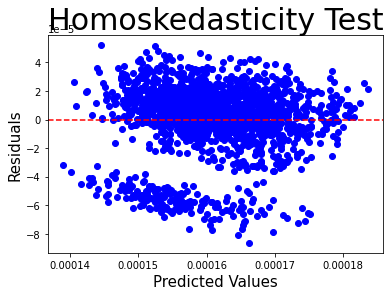

                          PooledOLS Estimation Summary                          
Dep. Variable:                 deaths   R-squared:                        0.1083
Estimator:                  PooledOLS   R-squared (Between):              0.2245
No. Observations:                1750   R-squared (Within):              -0.3378
Date:                Thu, Feb 24 2022   R-squared (Overall):              0.1083
Time:                        15:41:50   Log-likelihood                 1.615e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      212.22
Entities:                          10   P-value                           0.0000
Avg Obs:                       175.00   Distribution:                  F(1,1748)
Min Obs:                       175.00                                           
Max Obs:                       175.00   F-statistic (robust):             6.1155
                            

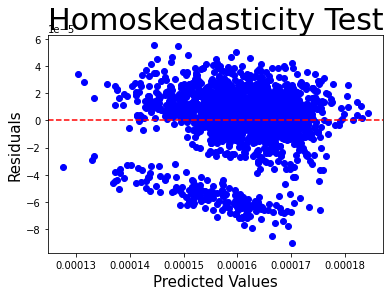

In [ ]:
# mortality
varlist = ['min','max']

for i in varlist:
  exog = sm.tools.tools.add_constant(dataset[i])
  endog = d1['deaths']
  mod = PooledOLS(endog, exog)
  pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)

  print(pooledOLS_res)
  # Store values for checking homoskedasticity graphically
  fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
  residuals_pooled_OLS = pooledOLS_res.resids
  # Residuals-Plot for growing Variance Detection
  fig, ax = plt.subplots()
  ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
  ax.axhline(0, color = 'r', ls = '--')
  ax.set_xlabel('Predicted Values', fontsize = 15)
  ax.set_ylabel('Residuals', fontsize = 15)
  ax.set_title('Homoskedasticity Test', fontsize = 30)
  plt.show()